<a href="https://colab.research.google.com/github/Nouman-wisal/pytorch/blob/main/02_1_Multi_class_classification_Neurel_Netwroks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `3.` Multi_class_classification Neurel Network

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

(1000, 2) (1000,) 
 <class 'numpy.ndarray'> <class 'numpy.ndarray'> 
 float64 int64


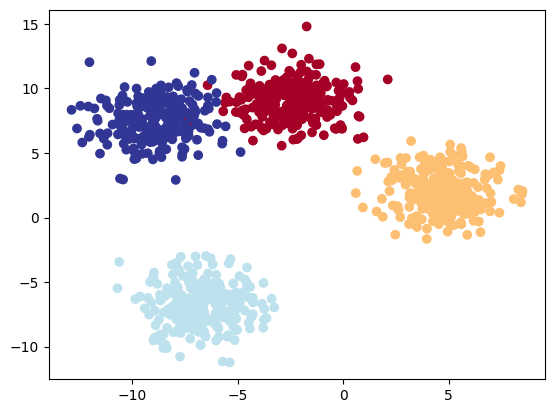

In [ ]:
                                          # importing dataset and analyzing it

from sklearn.datasets import make_blobs

X, y= make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.5, random_state=42)

print(X.shape, y.shape, "\n",type(X), type(y), "\n", X.dtype, y.dtype)

# plotting data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
import pandas as pd

df= pd.DataFrame({
    'X1':     X[:,0],
    'X2':     X[:,1],
    'label':  y

})

print(df["label"].value_counts(),'\n') # shows how many of each class is in labels/dataset
df.head(5)


label
3    250
2    250
1    250
0    250
Name: count, dtype: int64 



,X1,X2,label
0,-8.413396,6.935165,3
1,-5.766484,-6.431171,2
2,-6.042137,-6.766102,2
3,3.950837,0.698403,1
4,4.250492,-0.281545,1


###Converting to tensor and changing dtype

In [ ]:
# but first convert it to tensor and change dtype
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

print(type(X),X.dtype, type(y),y.dtype)

<class 'torch.Tensor'> torch.float32 <class 'torch.Tensor'> torch.float32


#Train_Test_Split

splitting the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# now splitting for training and testing
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

len(x_train), len(y_train), len(x_test), len(y_test) , torch.unique(y) #it'll show all the classes involved

(800, 800, 200, 200, tensor([0., 1., 2., 3.]))

#Building the model for multi_class classification

In [ ]:

                                                                    # ------->  IMPORTANT  <-------
# Add Regularization[L1(dropout), L2(weight_decay in optimizer after lr)] after relu if model is overfitting(training loss and acc is good but test loss and acc is bad)

device= 'cuda' if torch.cuda.is_available() else 'cpu'

                                                                        #  Building the model
class BlobMOdelV1(nn.Module):
  def __init__(self, input, output, hidden_units):
    super().__init__()

    self.layer_stack= nn.Sequential(
        nn.Linear(in_features= input, out_features= hidden_units),
        nn.ReLU(),
        # nn.Dropout(p=0.2)

        nn.Linear(in_features= hidden_units, out_features= hidden_units),
        nn.ReLU(),
        # nn.Dropout(p=0.2)

        nn.Linear(in_features=hidden_units, out_features= output)
    )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)


In [ ]:

                                                                   # Model Instance

model_4= BlobMOdelV1(input=2, output=4, hidden_units=8).to(device)

model_4, next(model_4.parameters()).device

# print(model_4.state_dict())

(BlobMOdelV1(
   (layer_stack): Sequential(
     (0): Linear(in_features=2, out_features=8, bias=True)
     (1): ReLU()
     (2): Linear(in_features=8, out_features=8, bias=True)
     (3): ReLU()
     (4): Linear(in_features=8, out_features=4, bias=True)
   )
 ),
 device(type='cpu'))

##loss function / accuracy function  and Optimizer

In [ ]:
# loss function for multi-class classification is ***CrossEntropyLoss***
                                                                          # -----> IMPORTANT <------

# if you have IMBALALANCED DATA like "class 0" =600, "class 1"= 200, "class 2"= 150 and "class 3"= 50 samples then use class_weights i.e
# class_weights= torch.tensor([0.25, 0.50, 1.0, 2.0])
# loss_fn= nn.CrossEntropyLoss(weight= class_weights)
loss_fn= nn.CrossEntropyLoss()

# optimizer
                                                                         # -----> IMPORTANT <------
#  if you Notice overfitting & Want extra regularization then use L2(weights_decay) in optimizer but 1st try dropout alone
# optimizer= torch.optim.Adam(params= model_4.parameters(), lr= 0.1, weight_decay= 1e-4)
optimizer= torch.optim.Adam(params= model_4.parameters(), lr= 0.1)

# accuracy function
# It's only useful if data is BALANCED plus ALSO can be imported by sklearn

# from sklearn.metrics import accuracy_score
# train_or_test_accuracy= accuracy_score(y_true.cpu().numpy(), y_pred.cpu().numpy()) , IMPORT THIS AFTER LOSS IN BOTH TRAIN & TEST

def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred)) * 100
  return acc

###Making prediction from `UNTRAINED` & `UNTESTED` Model for `FYI`

In [ ]:
# first
x_train, y_train= x_train.to(device), y_train.to(device)
x_test, y_test=   x_test.to(device),  y_test.to(device)

              # now try preds for fyi
model_4.eval()
with torch.inference_mode():
  y_logitss= model_4(x_test)

y_predss= torch.softmax(y_logitss, dim=1).argmax(dim=1)

y_predss

tensor([3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3,
        3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3,
        3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        2, 3, 3, 3, 3, 2, 3, 3])

#`Training` & `Testing` the Model

In [ ]:
# converting trainig and testing data device

  # -----> IMPORTANT : both labels need to be in torch.long format in multi-class classification bcz loss_fn expects them to be! but not xtrain or xtest theyre ok in float

x_train, y_train= x_train.to(device), y_train.type(torch.long).to(device)
x_test, y_test=   x_test.to(device),  y_test.type(torch.long).to(device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

for epoch in range(epochs):
  model_4.train()

  # forward pass &
  train_logits= model_4(x_train)
  # from raw logits -> pred_probs -> y_preds
  train_preds=torch.softmax(train_logits, dim=1).argmax(dim=1)


  # calculate loss
  train_loss = loss_fn(train_logits, y_train)
  # & accuracy
  train_acc= accuracy_fn(y_true= y_train, y_pred=train_preds)


  # zero.grad
  optimizer.zero_grad()

  # back propagation
  train_loss.backward()

  # gradient descent
  optimizer.step()

                          # now evaluationg/testing model
  model_4.eval()

  with torch.inference_mode():
    # forward pass
    test_logits= model_4(x_test)
    test_preds= torch.softmax(test_logits, dim=1).argmax(dim=1)

    # calculate loss
    test_loss= loss_fn(test_logits, y_test)
    #  & accuracy
    test_acc= accuracy_fn(y_true= y_test, y_pred= test_preds)

  if epoch % 50 ==0:
    print(f'epoch:{epoch}, training_loss:{train_loss:.4f}, training_accuracy:{train_acc:.2f}%, testing_loss:{test_loss:.4f}, testing_accuracy:{test_acc:.2f}%')

epoch:0, training_loss:0.0138, training_accuracy:99.38%, testing_loss:0.0022, testing_accuracy:100.00%
epoch:50, training_loss:0.0133, training_accuracy:99.38%, testing_loss:0.0023, testing_accuracy:100.00%
epoch:100, training_loss:0.0132, training_accuracy:99.50%, testing_loss:0.0018, testing_accuracy:100.00%
epoch:150, training_loss:0.0142, training_accuracy:99.62%, testing_loss:0.0035, testing_accuracy:100.00%
epoch:200, training_loss:0.0128, training_accuracy:99.62%, testing_loss:0.0029, testing_accuracy:100.00%
epoch:250, training_loss:0.0119, training_accuracy:99.38%, testing_loss:0.0024, testing_accuracy:100.00%
epoch:300, training_loss:0.0123, training_accuracy:99.38%, testing_loss:0.0020, testing_accuracy:100.00%
epoch:350, training_loss:0.0115, training_accuracy:99.38%, testing_loss:0.0014, testing_accuracy:100.00%
epoch:400, training_loss:0.0118, training_accuracy:99.50%, testing_loss:0.0012, testing_accuracy:100.00%
epoch:450, training_loss:0.0116, training_accuracy:99.62%,

#Making ***`Preds!!!`*** with `trained` & `tested` model

In [ ]:
model_4.eval()

with torch.inference_mode():
  y_logits= model_4(x_test)
  y_preds=torch.softmax(y_logits, dim=1).argmax(dim=1)

print(y_logits[:5],'\n\n')
print(y_preds[:5],'\n\n')

torch.eq(y_test, y_preds)

tensor([[-3.3681e+02,  3.8513e+02, -2.2666e+02, -2.4356e+02],
        [-4.0418e-01, -1.7191e+01, -3.6296e+01,  8.0483e+00],
        [-9.5584e+02,  1.1643e+02,  6.6881e+02, -7.6390e+02],
        [-5.1795e+02,  5.8688e+02, -3.1986e+02, -3.4762e+02],
        [ 3.7612e+00, -1.5548e+00, -4.9178e+00, -2.3347e+00]]) 


tensor([1, 3, 2, 1, 0]) 




tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [ ]:
x_test[:5] , y_preds[:20]

(tensor([[ 4.6675,  4.4878],
         [-7.9969,  6.8803],
         [-6.2801, -7.8571],
         [ 3.6833,  1.1767],
         [-0.1404, 10.1654]]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3]))

Text(0.5, 1.0, 'Predicted Data')

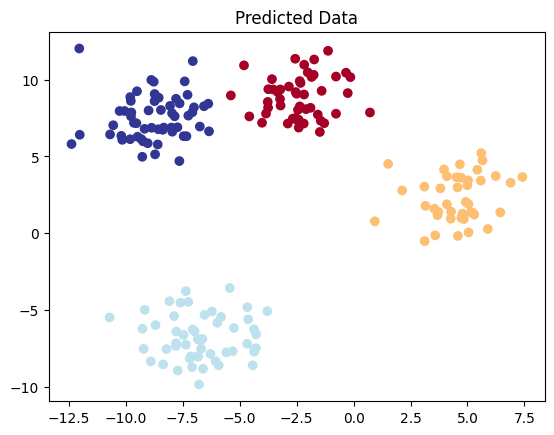

In [ ]:
# visuallizing the data by scattering on graph
                                      # y_preds is the prediction we made from model
plt.scatter(x_test[:,0], x_test[:,1], c=y_preds, cmap=plt.cm.RdYlBu)
plt.title('Predicted Data')

### checking the boundries with helper_function plot_decision_boundry

In [ ]:
import requests
from pathlib import Path

if Path('helper_function.py').is_file():
  print('helper_function.py already exists,skipping downoad!')
else:
  print('downloading helper_function.py')
  request= requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

  with open('helper_function.py', 'wb') as f:
    f.write(request.content)

from helper_function import plot_decision_boundary

helper_function.py already exists,skipping downoad!


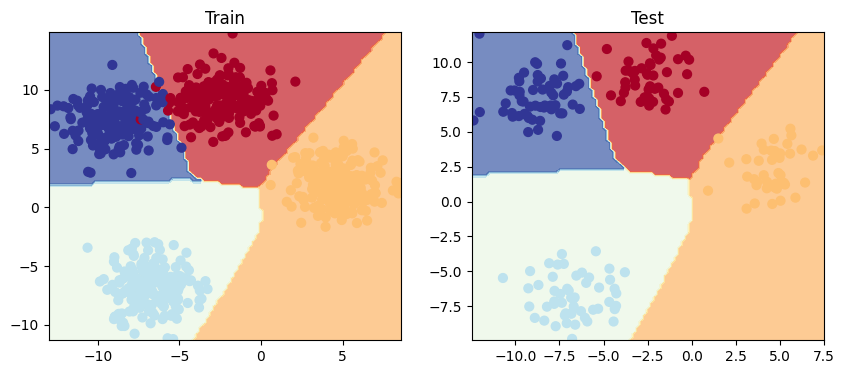

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, x_train, y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, x_test, y_test)

                                  #               ----------- IMPORTANT -----------

#                                               Model SUCCESSFULLY Trained & Tested & Completed!